In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv(r'..\Datasets\Misc\titanic.csv')
df.drop(["PassengerId", "Name", "SibSp", "Parch", "Cabin", "Embarked", "Ticket", "Fare"], axis=1, inplace=True)

inputs = df.drop("Survived", axis=1)
target = df.Survived

inputs.Sex = [1 if sex == 'female' else 0 for sex in inputs.Sex]
inputs = inputs.apply(lambda col: col.fillna(col.mean()) if col.isna().any() else col)

inputs['Survived'] = target

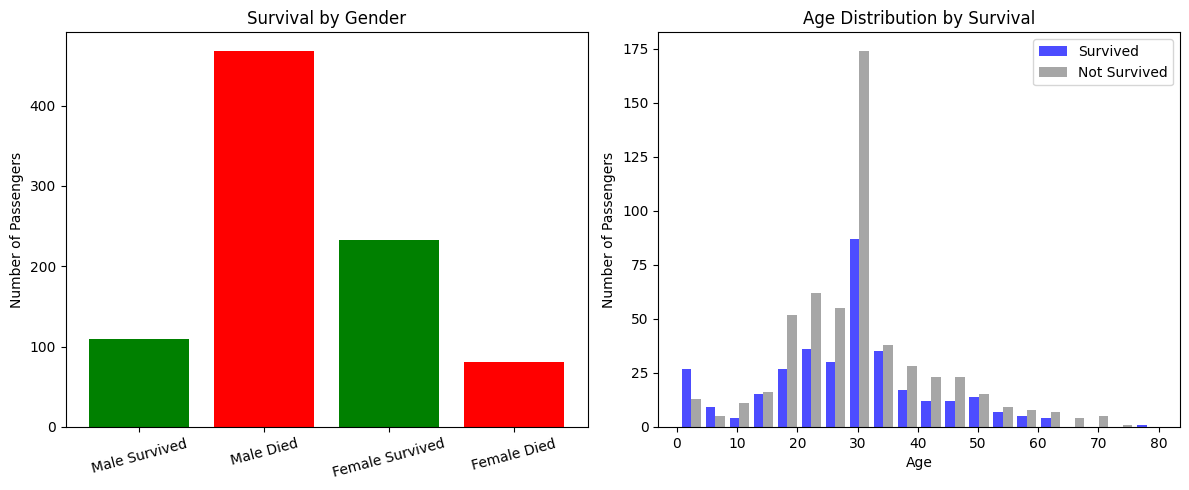

In [7]:
male_survived = inputs[(inputs.Sex == 0) & (inputs.Survived == 1)].shape[0]
male_died = inputs[(inputs.Sex == 0) & (inputs.Survived == 0)].shape[0]
female_survived = inputs[(inputs.Sex == 1) & (inputs.Survived == 1)].shape[0]
female_died = inputs[(inputs.Sex == 1) & (inputs.Survived == 0)].shape[0]

fig, axs = plt.subplots(1, 2, figsize=(12, 5))


axs[0].bar(['Male Survived', 'Male Died', 'Female Survived', 'Female Died'],
           [male_survived, male_died, female_survived, female_died],
           color=['green', 'red', 'green', 'red'])
axs[0].set_title('Survival by Gender')
axs[0].set_ylabel('Number of Passengers')
axs[0].tick_params(axis='x', rotation=15)


survived = inputs[inputs.Survived == 1]['Age']
not_survived = inputs[inputs.Survived == 0]['Age']

axs[1].hist([survived, not_survived], bins=20, label=['Survived', 'Not Survived'], color=['blue', 'gray'], alpha=0.7)
axs[1].set_title('Age Distribution by Survival')
axs[1].set_xlabel('Age')
axs[1].set_ylabel('Number of Passengers')
axs[1].legend()

plt.tight_layout()
plt.show()